In [400]:
import pandas as pd
import numpy as np
from numpy import linalg as lin
from matplotlib import pyplot as plt


In [401]:
#contains all the column names to be assigned
colnames = ["symboling","normalized-losses" , "make" ,"fuel-type" , "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

#reading the data and giving each columns heading using colnames
data = pd.read_csv('imports-85.data', sep=',', names = colnames)

In [402]:
#replacing '?' by NaN so as to recoganize them as empty
data.replace(to_replace = '?',value = np.nan, inplace=True)

In [403]:
#this contains names of all the numeric/continous columns
cont_cols = ['normalized-losses', 'wheel-base','length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
#The ones which are not continous are nominal
nominal_cols = [x for x in colnames if x not in cont_cols]

#converting the datatype of all the numeric columns to numeric
for col in cont_cols:
    data[col] = pd.to_numeric(data[col])


In [404]:
#droping the rows which contains '?' in the nominal/categorical features
data.dropna(subset = (nominal_cols + ['price']), inplace = True)

In [405]:
#filling the numeric feature values with its mean so as to preserve data
data.fillna(data.mean(), inplace = True)


In [406]:
#normalizing the numeric data
for col in cont_cols[:-1]:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

In [407]:
shuffled_data = data.sample(frac = 1, random_state = 1)
# shuffled_data

In [408]:
#splitting the dataset into training and testing dataset

training_size = int(0.9*len(data))

train_data = shuffled_data[0:training_size].reset_index()
test_data = shuffled_data[training_size:].reset_index()

train_data = train_data.drop('index', axis = 1)
test_data = test_data.drop('index', axis = 1)


In [409]:
#Splitting training and test dataset into 

X_train = train_data.drop('price', axis = 1)
Y_train = train_data['price']
X_test = test_data.drop('price', axis = 1)
Y_test = test_data['price']


In [430]:
#applying the kNN model
#initially diff contains the difference of all the cont columns
#then we concatenate it with each of the nominal column
#finally we get the L2 norm of the difference and sorted it according to the nearest neighbour
def kNN(x):
    diff = X_train[cont_cols[:-1]] - x[cont_cols[:-1]]
    for col in nominal_cols:
        diff_col = (X_train[col] != x[col])
        diff = pd.concat([diff, diff_col], axis=1)
    diff = diff.astype(float)
    dist = lin.norm(diff, 2, axis=1)
    idx = np.argsort(dist)
    y_pred = 0
    for i in range(k):
        y_pred += Y_train[idx[i]]
    return y_pred / k

In [427]:
k = 1

In [428]:
#calculating root mean squared error
def rmse(y_pred):
    diff = Y_test - y_pred
    return lin.norm(diff, 2)

#applying kNN model
def test():
    y_pred = X_test.apply(kNN, axis=1)
    return rmse(y_pred)

test()



6066.935140579632

In [367]:
#printing RMSE for different values of K
for k in range(1, 50):
    print(f'k = {k}, RMSE = {test()}')

k = 1, RMSE = 6066.935140579632
k = 2, RMSE = 7226.618832483141
k = 3, RMSE = 7721.385778040968
k = 4, RMSE = 8126.2419896899455
k = 5, RMSE = 7319.006156576178
k = 6, RMSE = 6342.807917458779
k = 7, RMSE = 6518.7847809548175
k = 8, RMSE = 6752.321497779486
k = 9, RMSE = 7674.893889965008
k = 10, RMSE = 7524.5007482224355
k = 11, RMSE = 7391.317168092494
k = 12, RMSE = 7161.337158368771
k = 13, RMSE = 7183.766832611247
k = 14, RMSE = 7674.272957985888
k = 15, RMSE = 7691.3756035936485
k = 16, RMSE = 7511.492527079755
k = 17, RMSE = 7202.096898133474
k = 18, RMSE = 7061.9730186872475
k = 19, RMSE = 6906.746602932462
k = 20, RMSE = 6387.345960960624
k = 21, RMSE = 6314.235817514553
k = 22, RMSE = 6293.165417096721
k = 23, RMSE = 6322.81011037588
k = 24, RMSE = 6259.882832342214
k = 25, RMSE = 6435.383807419726
k = 26, RMSE = 6438.679943451234
k = 27, RMSE = 6430.772708703159
k = 28, RMSE = 6548.451800982879
k = 29, RMSE = 6602.514923324517
k = 30, RMSE = 6727.250135662994
k = 31, RMSE = 

1


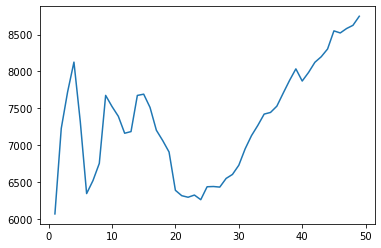

In [370]:
#plotting the error/loss function
error = []
K_MAX = 50
min_error = 1e9
k_min_error =0
for k in range(1, K_MAX):
  l = test()
  error.append(l)
  if l <min_error:
    k_min_error = k
    min_error = l
plt.plot(range(1, K_MAX), error)

In [375]:
print("Optimal K is",k_min_loss, "and min_loss for that k is",min_loss)

Optimal K is 1 and min_loss for that k is 6066.935140579632


Question 2

In [378]:
import pandas as pd
import numpy as np
from numpy import linalg as lin
from matplotlib import pyplot as plt

In [379]:
cols_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [380]:
#data is seperated by ', ', therefore it should be split by that
data = pd.read_csv('adult.data', sep='\,\ ', names=cols_names)

#replacing ? with NaN and droping the rows containg '?'
data.replace('?', np.nan, inplace=True)
data.dropna(inplace = True)

<ipython-input-380-13a664a44684>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('adult.data', sep='\,\ ', names=cols_names)


In [381]:
#defining nominal/categorical columns
nominal_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in nominal_cols:
    data[col] = data[col].astype('category').cat.codes

In [382]:
#classifying final label into 1 and -1
data['income'].replace('<=50K', -1, inplace=True)
data['income'].replace('>50K', 1, inplace=True)

In [383]:
#shuffling the data
shuffled_data = data.sample(frac = 1, random_state=1)

In [384]:
#splitting the data into training and test data
training_size = (int)(0.8*len(data))
train_data = shuffled_data[0:training_size].reset_index()
test_data = shuffled_data[training_size:].reset_index()

train_data = train_data.drop('index', axis = 1)
test_data = test_data.drop('index', axis = 1)

# train_data


In [385]:
#splitting the dataset into X and Y
X_train = train_data.drop('income', axis = 1)
Y_train = train_data['income']
X_test = test_data.drop('income', axis = 1)
Y_test = test_data['income']

In [386]:
class Node:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    def predict( self, data ):
        # If I am a leaf I can predict rightaway
        # May change this constant leaf action to something more interesting and powerful
        if self.isLeaf:
            return self.label
        # Else I have to ask one of my children to do the job
        else:
            if data[self.stump[0]] > self.stump[1]:
                return self.right.predict( data )
            else:
                return self.left.predict( data )
    
    #entropy calculation function
    def getEntropy(self, nPos, nNeg):
        if nPos == 0 or nNeg == 0:
            return 0
        nTot = nPos + nNeg
        pPos = nPos / nTot
        pNeg = nNeg / nTot
        return -(pPos * float(np.log2(pPos)) + pNeg * float(np.log2(pNeg)))
            
    def getStump( self, X, y ):
        # How many data points do I have at this node?
        n = y.size
        nPos = (y == 1).sum()
        nNeg = (y == -1).sum()
        bestObjective = -float('inf')
        
        # For each of the features in the data
        for i in range( X.shape[1] ):
            # Do not use the same feature as used by the parent node
            if self.parent is not None and i == self.parent.stump[0]:
                continue
            # Find out all values at which we can threshold that feature
            candidateThresholds = np.sort( X[:, i] )
            idx = np.argsort( X[:, i] )
            # The cumulative sum trick used here will work only if labels are binary 
            ySorted = y[idx]
            yCum = np.cumsum( ySorted )
            yCumRev = np.cumsum( ySorted[::-1] )[::-1]
            # For each possible threshold (except the ones at the extreme)
            for j in range( 1, candidateThresholds.size-1 ):
                candidateObjective = self.getEntropy(nPos, nNeg) \
                                    - ((j + 1) / n) * self.getEntropy( (yCum[j] + j+1)/2, (j+1 - yCum[j])/2 ) \
                                    - ((n - j - 1) / n) * self.getEntropy( (yCumRev[j+1] + n-j-1)/2, (n-j-1 - yCumRev[j+1])/2 )
                if candidateObjective > bestObjective:
                    bestObjective = candidateObjective
                    bestFeat = i
                    bestThresh = candidateThresholds[j]
        
        # # Can try LwP decision stump as well
        # bestThresh = (np.mean(X[y > 0, bestFeat]) + np.mean(X[y < 0, bestFeat]))/2
        return (bestFeat, bestThresh)
            
    def train( self, X, y, maxLeafSize, maxDepth ):
        # If too few data points are present, or else if this node is too deep in the tree, make this a leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label = 1 if y.sum() >= 0 else -1
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump
            self.stump = self.getStump( X, y )
            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            # Find which points go to my left child and which go to my right child
            discriminant = X[:, self.stump[0]] - self.stump[1]
            # Train my two children recursively
            self.left.train( X[discriminant <= 0, :], y[discriminant <= 0], maxLeafSize, maxDepth )
            self.right.train( X[discriminant > 0, :], y[discriminant > 0], maxLeafSize, maxDepth )


class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, xt ):
        return self.root.predict(xt)
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )


In [387]:
#defining tree and training it
DT = Tree()

DT.train(np.array(X_train), np.array(Y_train))

In [388]:
# Y_pred givves the predicted data value
Y_pred = X_test.apply(DT.predict, axis = 1)


In [389]:
#comp_arr contains 1 if predicted_value == actual value and 0 otherwise
comp_arr = (Y_pred == Y_test)

accuracy = (comp_arr.sum()/len(comp_arr))*100
accuracy

83.04326205867727

In [395]:
def test_with_params(maxLeafSize, maxDepth):
    new_tree = Tree(maxLeafSize, maxDepth)
    new_tree.train(np.array(X_train), np.array(Y_train))
    y_pred = X_test.apply(new_tree.predict, axis=1)
    accuracy = (y_pred == Y_test).sum() / len(Y_test) * 100
    print(f'For max leaf size = {maxLeafSize} and max depth = {maxDepth}, accuracy = {round(accuracy, 2)}%')
    return accuracy

In [398]:
#testing for different params
max_accuracy = 0
for maxDepth in range(1, 8):
    for maxLeafSize in range(5, 15, 5):
        accuracy = test_with_params(maxLeafSize, maxDepth)
        max_accuracy = max(accuracy, max_accuracy)

For max leaf size = 5 and max depth = 1, accuracy = 74.34%
For max leaf size = 10 and max depth = 1, accuracy = 74.34%
For max leaf size = 5 and max depth = 2, accuracy = 78.2%
For max leaf size = 10 and max depth = 2, accuracy = 78.2%
For max leaf size = 5 and max depth = 3, accuracy = 78.24%
For max leaf size = 10 and max depth = 3, accuracy = 78.24%
For max leaf size = 5 and max depth = 4, accuracy = 78.7%
For max leaf size = 10 and max depth = 4, accuracy = 78.7%
For max leaf size = 5 and max depth = 5, accuracy = 83.04%
For max leaf size = 10 and max depth = 5, accuracy = 83.04%
For max leaf size = 5 and max depth = 6, accuracy = 82.91%
For max leaf size = 10 and max depth = 6, accuracy = 82.89%
For max leaf size = 5 and max depth = 7, accuracy = 83.69%
For max leaf size = 10 and max depth = 7, accuracy = 83.67%


In [399]:
print("Maximum accuracy is ", max_accuracy)

Maximum accuracy is  83.68970661362506
